#BOOK RECOMMENDATION SYSTEM

In [4]:
#Importing modules
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')

In [5]:
file_path = ("P505/Users.csv")
users = pd.read_csv(file_path, encoding="cp1252")
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
#Books data
file_path = ("P505/Books.csv")
books = pd.read_csv(file_path, encoding="cp1252")
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [7]:
#Ratings Data
file_path = ("P505/Ratings.csv")
ratings = pd.read_csv(file_path,encoding="cp1252")
ratings.head()


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


##dimenstion of dataset

In [8]:
# dimension of dataset
print(f'''\t  Book_df shape is {books.shape}
          Ratings_df shape is {ratings.shape}
          Users_df shape is {users.shape}''')

	  Book_df shape is (271360, 8)
          Ratings_df shape is (1149780, 3)
          Users_df shape is (278858, 3)


#users_DATASET

In [9]:
users.info

<bound method DataFrame.info of         User-ID                            Location   Age
0             1                  nyc, new york, usa   NaN
1             2           stockton, california, usa  18.0
2             3     moscow, yukon territory, russia   NaN
3             4           porto, v.n.gaia, portugal  17.0
4             5  farnborough, hants, united kingdom   NaN
...         ...                                 ...   ...
278853   278854               portland, oregon, usa   NaN
278854   278855  tacoma, washington, united kingdom  50.0
278855   278856           brampton, ontario, canada   NaN
278856   278857           knoxville, tennessee, usa   NaN
278857   278858                dublin, n/a, ireland   NaN

[278858 rows x 3 columns]>

In [10]:
users.dtypes

User-ID       int64
Location     object
Age         float64
dtype: object

In [11]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [12]:
print(users.columns)

Index(['User-ID', 'Location', 'Age'], dtype='object')


In [13]:
users[users.duplicated(keep=False)]

,User-ID,Location,Age


In [14]:
def missing_values(df):
    mis_val=df.isnull().sum()
    mis_val_percent=round(df.isnull().mean().mul(100),2)
    mz_table=pd.concat([mis_val,mis_val_percent],axis=1)
    mz_table=mz_table.rename(
    columns={df.index.name:'col_name',0:'Missing Values',1:'% of Total Values'})
    mz_table['Data_type']=df.dtypes
    mz_table=mz_table.sort_values('% of Total Values',ascending=False)
    return mz_table.reset_index()

In [15]:
missing_values(users)

,index,Missing Values,% of Total Values,Data_type
0,Age,110762,39.72,float64
1,User-ID,0,0.00,int64
2,Location,0,0.00,object


#Age have around 39% missing values.

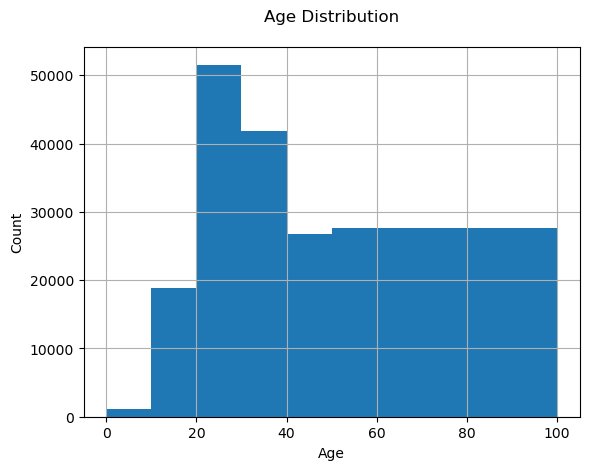

In [16]:
users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#LETS CHECK OUTLIERS FOR AGE

Text(0.5, 1.0, 'Find outlier data in Age column')

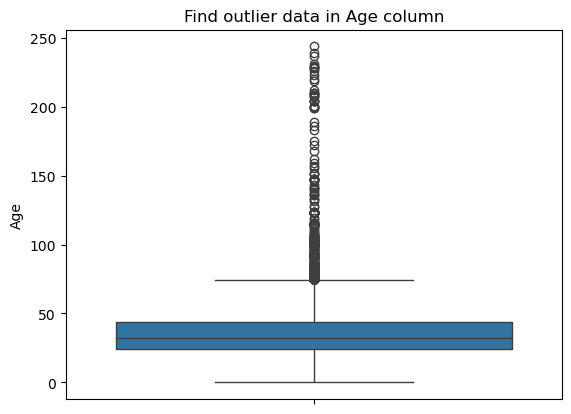

In [17]:
sns.boxplot(y='Age', data=users)
plt.title('Find outlier data in Age column')

#The most active users are among those in their 20–30s.

In [18]:
print(sorted(users.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [19]:
users.Location.unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

In [20]:
users.Location.nunique()

57339

57339 unique Value it's really hard to understand
So lets create column Country

In [21]:
for i in users:
    users['Country']=users.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')   

In [22]:
users.Country.nunique()

529

In [23]:
#drop location column
users.drop('Location',axis=1,inplace=True)

In [24]:
users.head(2)

,User-ID,Age,Country
0,1,NaN,usa
1,2,18.0,usa


In [25]:
users.isnull().sum()

User-ID         0
Age        110762
Country       368
dtype: int64

In [26]:
users['Country']=users['Country'].astype('str')

In [27]:
a=list(users.Country.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['', '01776', '02458', '19104', '23232', '30064', '85021', '87510', '_ brasil', 'a', 'aaa', 'adsgfdr', 'afghanistan', 'ahrensburg', 'alachua', 'albania', 'alderney', 'algeria', 'algérie', 'allen', 'ama lurra', 'america', 'american samoa', 'andorra', 'angola', 'antarctica', 'aotearoa', 'argentina', 'armenia', 'aroostook', 'aruba', 'asturies', 'auckland', 'austbritania', 'australia', 'australii', 'austria', 'autralia', 'az', 'azerbaijan', 'bademn würtemberg', 'bahamas', 'bahrain', 'baltimore', 'bangladesh', 'barbados', 'basilicata', 'basque country', 'bavaria', 'baxter', 'bbbzzzzz', 'belarus', 'belgi', 'belgique', 'belgium', 'belize', 'bell', 'benin', 'berguedà', 'bermuda', 'bernalillo', 'bfe', 'bhutan', 'bih', 'bkk', 'bladen', 'bolivia', 'bosnia', 'botswana', 'brasil', 'brazil', 'brunei', 'brunei darussalam', 'bucks', 'bulgaria', 'buncombe', 'burkina faso', 'burkinafasu', 'burlington', 'burma', 'butler', 'c', 'cadd0', 'calabria', 'california', 'cambodia', 'camden', 'cameroon', 'can', 'c

In [28]:
users['Country'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','austria','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us'],
                           ['other','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','australia','canada','germany','italy','united kingdom','usa','usa','usa','usa','usa'],inplace=True)

Text(0.5, 1.0, 'Count of users Country wise')

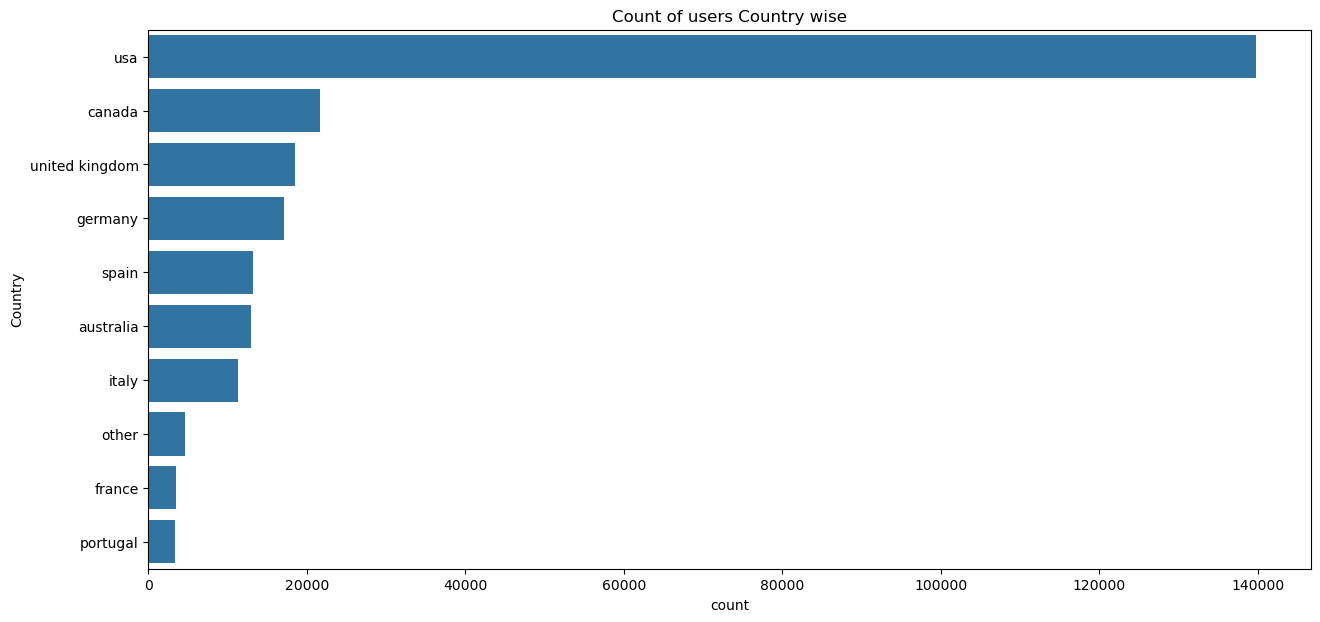

In [29]:
plt.figure(figsize=(15,7))
sns.countplot(y='Country',data=users,order=pd.value_counts(users['Country']).iloc[:10].index)
plt.title('Count of users Country wise')

#Most number of users are from USA

#LETS DRAW THE OUTLIERS

Text(0.5, 1.0, 'Age Distribution Plot')

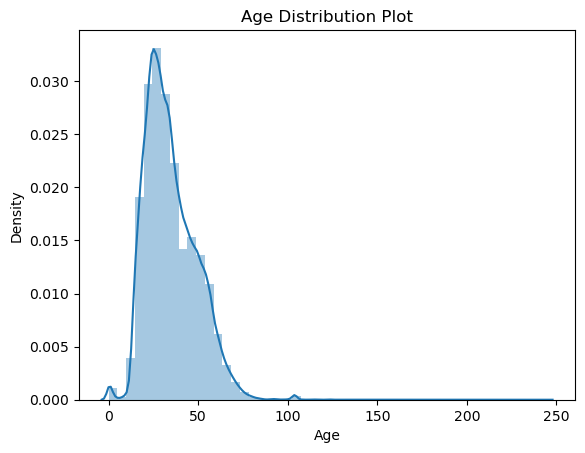

In [30]:
sns.distplot(users.Age)
plt.title('Age Distribution Plot')

In [31]:
# outlier data became NaN
users.loc[(users.Age > 100) | (users.Age < 5), 'Age'] = np.nan

In [32]:
users.isna().sum()

User-ID         0
Age        112010
Country         0
dtype: int64

In [33]:
users['Age'] = users['Age'].fillna(users.groupby('Country')['Age'].transform('median'))

In [34]:
users.isna().sum()

User-ID      0
Age        276
Country      0
dtype: int64

In [35]:
users['Age'].fillna(users.Age.mean(),inplace=True)

In [36]:
users.isna().sum()

User-ID    0
Age        0
Country    0
dtype: int64

##2.)Books_Dataset

In [37]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [38]:
books.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [39]:
books.info

<bound method DataFrame.info of               ISBN                                         Book-Title  \
0       0195153448                                Classical Mythology   
1       0002005018                                       Clara Callan   
2       0060973129                               Decision in Normandy   
3       0374157065  Flu: The Story of the Great Influenza Pandemic...   
4       0393045218                             The Mummies of Urumchi   
...            ...                                                ...   
271355  0440400988                         There's a Bat in Bunk Five   
271356  0525447644                            From One to One Hundred   
271357  006008667X  Lily Dale : The True Story of the Town that Ta...   
271358  0192126040                        Republic (World's Classics)   
271359  0767409752  A Guided Tour of Rene Descartes' Meditations o...   

                 Book-Author Year-Of-Publication  \
0         Mark P. O. Morford           

Text(0.5, 1.0, 'Top 10 Authors')

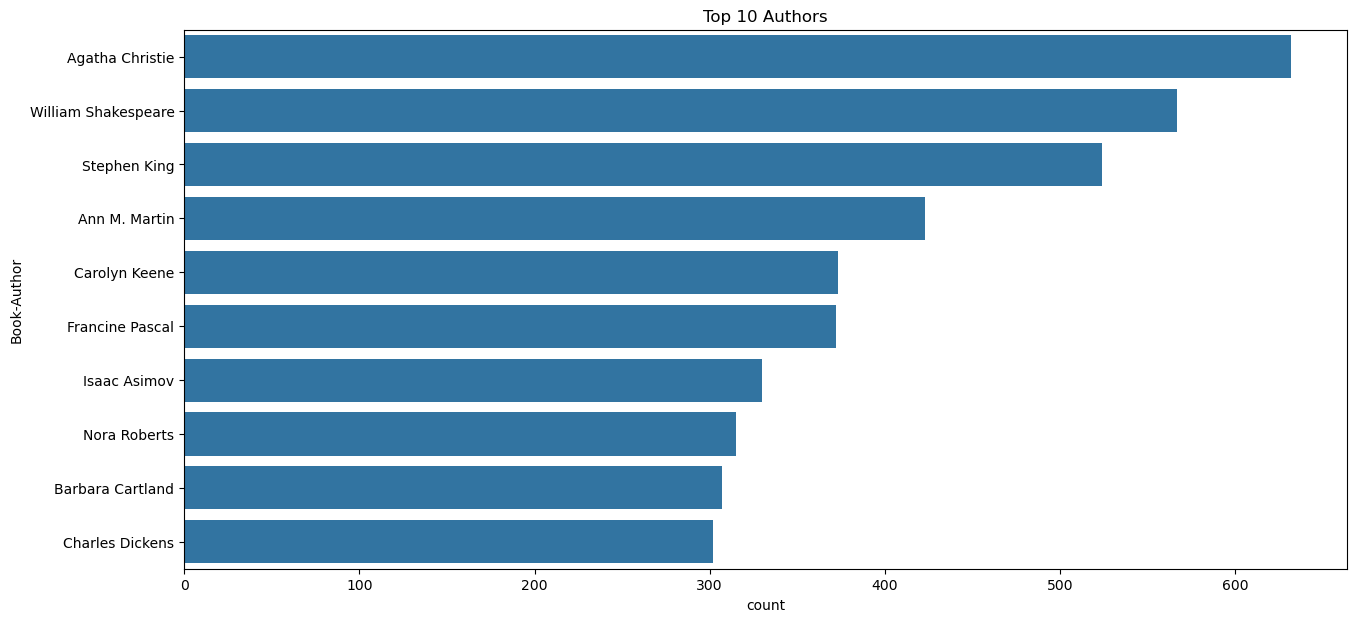

In [40]:
plt.figure(figsize=(15,7))
sns.countplot(y='Book-Author',data=books,order=pd.value_counts(books['Book-Author']).iloc[:10].index)
plt.title('Top 10 Authors')

#Top 10 Publisher which have published the most books.

Text(0.5, 1.0, 'Top 10 Publishers')

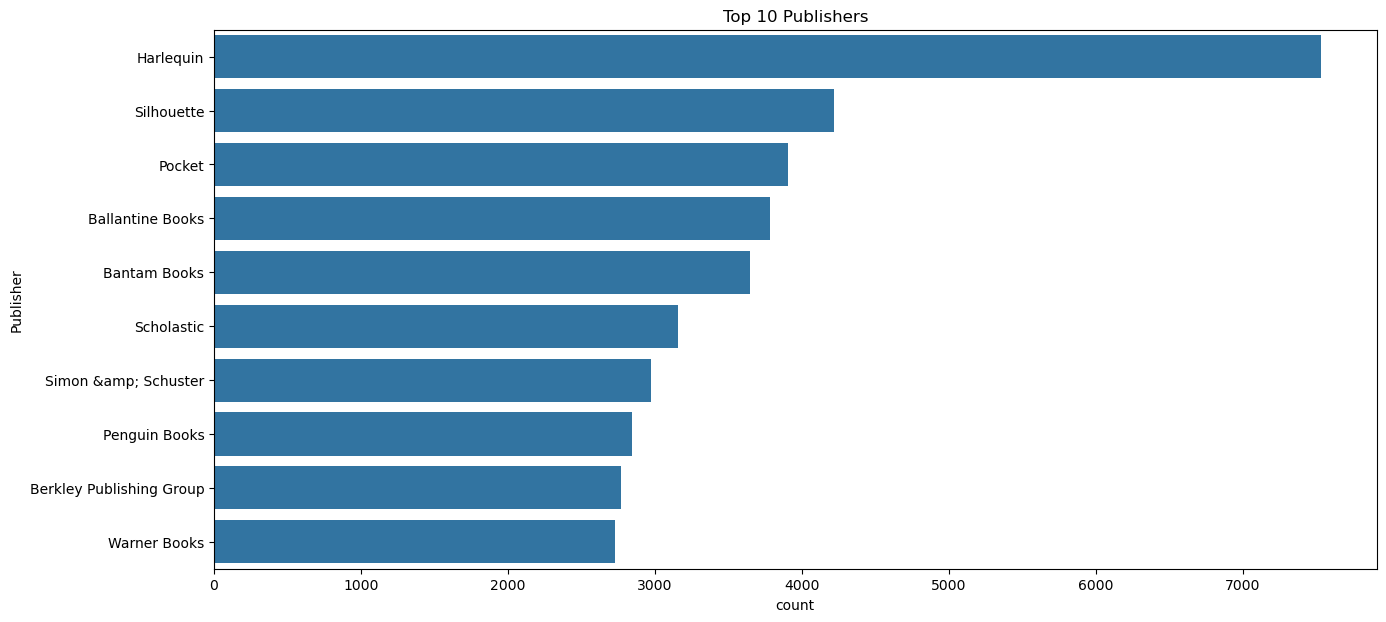

In [41]:
plt.figure(figsize=(15,7))
sns.countplot(y='Publisher',data=books,order=pd.value_counts(books['Publisher']).iloc[:10].index)
plt.title('Top 10 Publishers')

In [42]:
books['Year-Of-Publication']=books['Year-Of-Publication'].astype('str')
a=list(books['Year-Of-Publication'].unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['0', '1376', '1378', '1806', '1897', '1900', '1901', '1902', '1904', '1906', '1908', '1909', '1910', '1911', '1914', '1917', '1919', '1920', '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928', '1929', '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2008', '2010', '2011', '2012', '2020', '2021', '2024', '2026', '2030', '2037', '2038', '2050', 'DK Publishing Inc', 'Gallimard']


In [43]:
#investigating the rows having 'DK Publishing Inc' as yearOfPublication
books.loc[books['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [44]:
#From above, it is seen that bookAuthor is incorrectly loaded with bookTitle, hence making required corrections
#ISBN '0789466953'
books.loc[books.ISBN == '0789466953','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '0789466953','Book-Author'] = "James Buckley"
books.loc[books.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

#ISBN '078946697X'
books.loc[books.ISBN == '078946697X','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

#rechecking
books.loc[(books.ISBN == '0789466953') | (books.ISBN == '078946697X'),:]
#corrections done

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [45]:
#investigating the rows having 'Gallimard' as yearOfPublication
books.loc[books['Year-Of-Publication'] == 'Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [46]:
#making required corrections as above, keeping other fields intact
books.loc[books.ISBN == '2070426769','Year-Of-Publication'] = 2003
books.loc[books.ISBN == '2070426769','Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
books.loc[books.ISBN == '2070426769','Publisher'] = "Gallimard"
books.loc[books.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"


books.loc[books.ISBN == '2070426769',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [47]:
books['Year-Of-Publication']=pd.to_numeric(books['Year-Of-Publication'], errors='coerce')

print(sorted(books['Year-Of-Publication'].unique()))
#Now it can be seen that yearOfPublication has all values as integers

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [48]:
books.loc[(books['Year-Of-Publication'] > 2006) | (books['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.NAN

#replacing NaNs with median value of Year-Of-Publication
books['Year-Of-Publication'].fillna(round(books['Year-Of-Publication'].median()), inplace=True)

In [49]:
#dropping last three columns containing image URLs which will not be required for analysis
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1,inplace=True)

In [50]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
dtype: int64

In [51]:
#exploring 'publisher' column
books.loc[books.Publisher.isnull(),:]
#two NaNs|

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002.0,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001.0,NaN


In [52]:
#Filling Nan of Publisher with others
books.Publisher.fillna('other',inplace=True)

In [53]:
#exploring 'Book-Author' column
books.loc[books['Book-Author'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999.0,Dorling Kindersley
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995.0,Edinburgh Financial Publishing


In [54]:
#Filling Nan of Book-Author with others
books['Book-Author'].fillna('other',inplace=True)

In [55]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

#3.)Ratings_Dataset

In [56]:
ratings.head(2)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5


In [57]:
ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]
ratings.shape,ratings_new.shape

((1149780, 3), (1031136, 3))

It can be seen that many rows having book ISBN not part of books dataset got dropped off

Ratings dataset should have ratings from users which exist in users dataset.


In [58]:
print("Shape of dataset before dropping",ratings_new.shape)
ratings_new = ratings_new[ratings_new['User-ID'].isin(users['User-ID'])]
print("shape of dataset after dropping",ratings_new.shape)

Shape of dataset before dropping (1031136, 3)
shape of dataset after dropping (1031136, 3)


It can be seen that no new user was there in ratings dataset.

Let's see how the ratings are distributed

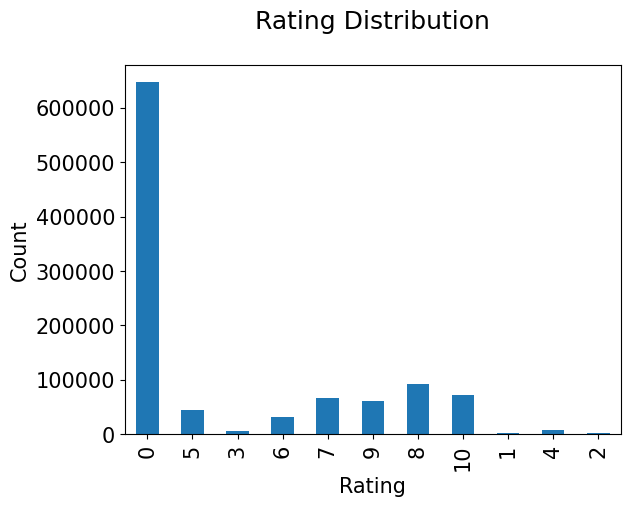

In [59]:
plt.rc("font", size=15)
ratings_new['Book-Rating'].value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [60]:
#Hence segragating implicit and explict ratings datasets
ratings_explicit = ratings_new[ratings_new['Book-Rating'] != 0]
ratings_implicit = ratings_new[ratings_new['Book-Rating'] == 0]

In [61]:
print('ratings_explicit dataset shape',ratings_explicit.shape)
print('ratings_implicit dataset',ratings_implicit.shape)

ratings_explicit dataset shape (383842, 3)
ratings_implicit dataset (647294, 3)


<Axes: xlabel='Book-Rating', ylabel='count'>

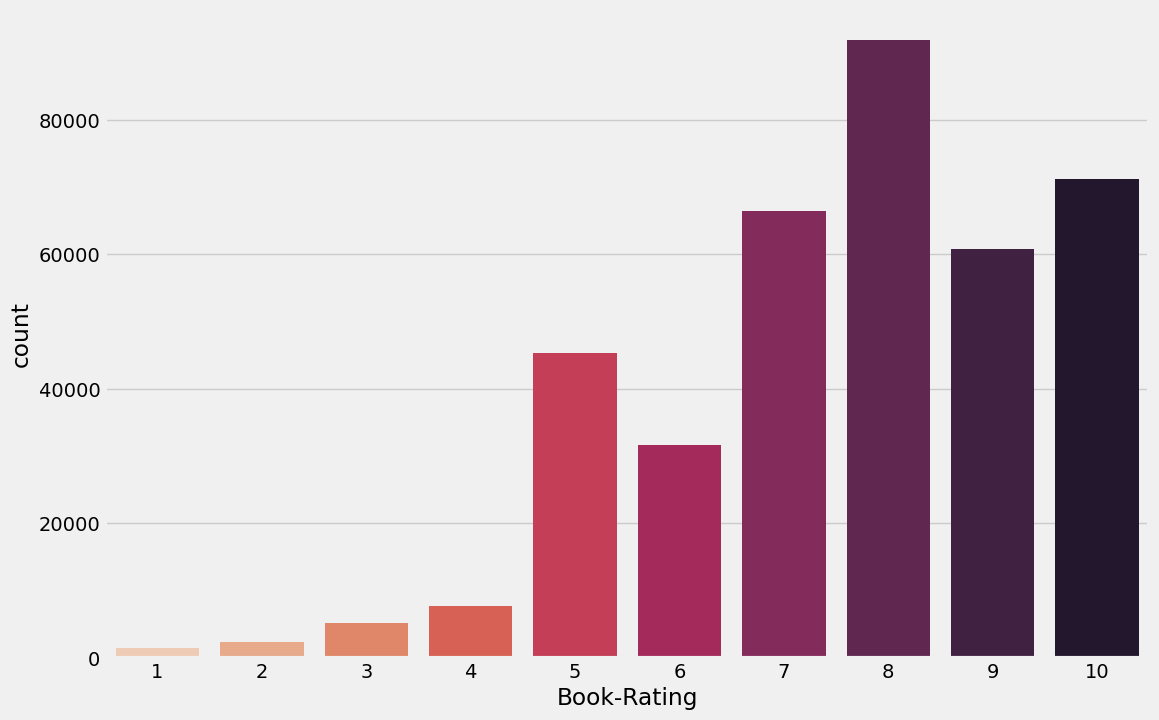

In [62]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))
sns.countplot(data=ratings_explicit , x='Book-Rating', palette='rocket_r')

Let's find the top 5 books which are rated by most number of users.

In [63]:
rating_count = pd.DataFrame(ratings_explicit.groupby('ISBN')['Book-Rating'].count())
rating_count.sort_values('Book-Rating', ascending=False).head()

,Book-Rating
ISBN,
0316666343,707
0971880107,581
0385504209,487
0312195516,383
0060928336,320


In [64]:
most_rated_books = pd.DataFrame(['0316666343', '0971880107', '0385504209', '0312195516', '0060928336'], index=np.arange(5), columns = ['ISBN'])
most_rated_books_summary = pd.merge(most_rated_books, books, on='ISBN')
most_rated_books_summary

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown"
1,0971880107,Wild Animus,Rich Shapero,2004.0,Too Far
2,0385504209,The Da Vinci Code,Dan Brown,2003.0,Doubleday
3,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA
4,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997.0,Perennial


In [65]:
# Create column Rating average 
ratings_explicit['Avg_Rating']=ratings_explicit.groupby('ISBN')['Book-Rating'].transform('mean')
# Create column Rating sum
ratings_explicit['Total_No_Of_Users_Rated']=ratings_explicit.groupby('ISBN')['Book-Rating'].transform('count')

In [66]:
ratings_explicit.head()

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated
1,276726,0155061224,5,5.000000,1
3,276729,052165615X,3,3.000000,1
4,276729,0521795028,6,6.000000,1
8,276744,038550120X,7,7.580247,81
16,276747,0060517794,9,8.000000,30


#MERGING ALL DATASETS

In [67]:
Final_Dataset=users.copy()
Final_Dataset=pd.merge(Final_Dataset,ratings_explicit,on='User-ID')
Final_Dataset=pd.merge(Final_Dataset,books,on='ISBN')

In [68]:
Final_Dataset.head()

,User-ID,Age,Country,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,8,33.0,canada,0002005018,5,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
1,8,33.0,canada,074322678X,5,5.000000,1,Where You'll Find Me: And Other Stories,Ann Beattie,2002.0,Scribner
2,8,33.0,canada,0887841740,5,5.000000,1,The Middle Stories,Sheila Heti,2004.0,House of Anansi Press
3,8,33.0,canada,1552041778,5,5.000000,1,Jane Doe,R. J. Kaiser,1999.0,Mira Books
4,8,33.0,canada,1567407781,6,6.000000,1,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998.0,Brilliance Audio - Trade


In [69]:
missing_values(Final_Dataset)

,index,Missing Values,% of Total Values,Data_type
0,User-ID,0,0.0,int64
1,Age,0,0.0,float64
2,Country,0,0.0,object
3,ISBN,0,0.0,object
4,Book-Rating,0,0.0,int64
5,Avg_Rating,0,0.0,float64
6,Total_No_Of_Users_Rated,0,0.0,int64
7,Book-Title,0,0.0,object
8,Book-Author,0,0.0,object
9,Year-Of-Publication,0,0.0,float64


In [70]:
Final_Dataset.shape

(383842, 11)

##Popularity Based Filtering

As the name suggests Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any book which is usually bought by every new user then there are chances that it may suggest that book to the user who just signed up.
Book weighted avg formula:
Weighted Rating(WR)=[vR/(v+m)]+[mC/(v+m)]
where,
v is the number of votes for the books;
m is the minimum votes required to be listed in the chart;
R is the average rating of the book; and
C is the mean vote across the whole report.
Now we find the values ofv,m,R,C.



In [71]:
C= Final_Dataset['Avg_Rating'].mean()
m= Final_Dataset['Total_No_Of_Users_Rated'].quantile(0.90)
Top_Books = Final_Dataset.loc[Final_Dataset['Total_No_Of_Users_Rated'] >= m]
print(f'C={C} , m={m}')
Top_Books.shape

C=7.626700569505161 , m=64.0


(38570, 11)

Here we used 90th percentile as our cutoff. In other words, for a book to feature in the charts, it must have more votes than at least 90% of the books in the list.
We see that there are 38570 books which qualify to be in this list. Now, we need to calculate our metric for each qualified book. To do this, we will define a function, weighted_rating() and define a new feature score, of which we’ll calculate the value by applying this function to our DataFrame of qualified books:
den

Model Based Collaborative Filtering Recommender

In [72]:
import scipy
import math
import sklearn
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt

This analysis aims to build a book recommendation system using the Book-Crossing dataset. To enhance efficiency and prevent memory issues, we will refine the dataset by selecting users who have provided at least three ratings and focusing on the top 10% of the most frequently rated books. This filtering approach helps in reducing sparsity while retaining meaningful interactions.

For the recommendation model, we will leverage the Surprise package, employing matrix factorization-based techniques to learn latent features from user-book interactions. These models are well-suited for capturing hidden patterns in rating behavior, ultimately improving the quality of recommendations.



In [73]:
ratings_explicit.rename(columns = {'User-ID':'user_id' ,'ISBN':'isbn' ,'Book-Rating':'book_rating'},inplace=True)

In [74]:
user_ratings_threshold = 3

filter_users = ratings_explicit['user_id'].value_counts()
filter_users_list = filter_users[filter_users >= user_ratings_threshold].index.to_list()

df_ratings_top = ratings_explicit[ratings_explicit['user_id'].isin(filter_users_list)]

print('Filter: users with at least %d ratings\nNumber of records: %d' % (user_ratings_threshold, len(df_ratings_top)))

Filter: users with at least 3 ratings
Number of records: 327271


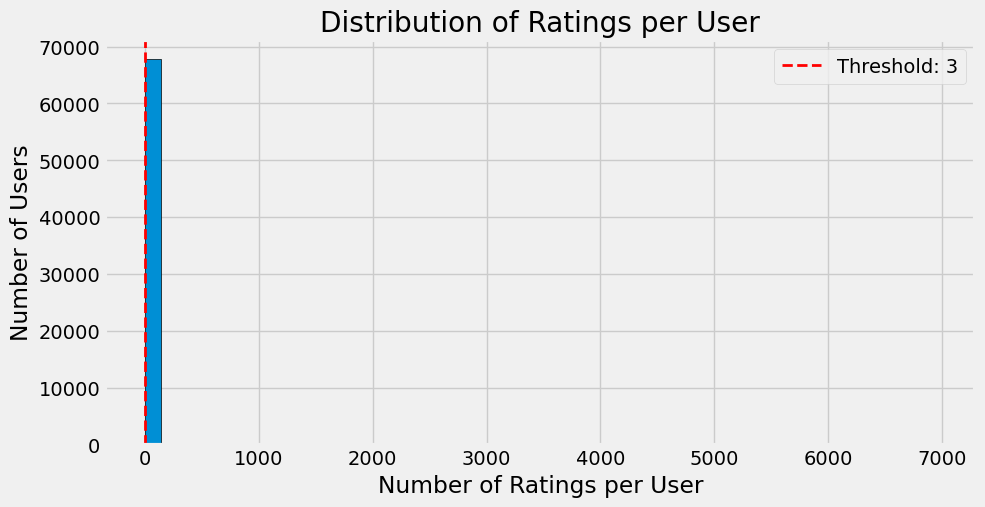

In [75]:
import matplotlib.pyplot as plt

# Plot distribution of user ratings count
plt.figure(figsize=(10,5))
ratings_explicit['user_id'].value_counts().hist(bins=50, edgecolor='black')
plt.axvline(user_ratings_threshold, color='red', linestyle='dashed', linewidth=2, label=f'Threshold: {user_ratings_threshold}')
plt.xlabel('Number of Ratings per User')
plt.ylabel('Number of Users')
plt.title('Distribution of Ratings per User')
plt.legend()
plt.show()


# Many users have rated only 1 or 2 books, which doesn't provide enough data for meaningful recommendations.
# Filtering out these low-rating users reduces noise and improves the efficiency of the recommendation system.
# The model can then focus on users with more interactions, leading to better book recommendations.

In [76]:
book_ratings_threshold_perc = 0.1
book_ratings_threshold = len(df_ratings_top['isbn'].unique()) * book_ratings_threshold_perc

filter_books_list = df_ratings_top['isbn'].value_counts().head(int(book_ratings_threshold)).index.to_list()
df_ratings_top = df_ratings_top[df_ratings_top['isbn'].isin(filter_books_list)]

print('Filter: top %d%% most frequently rated books\nNumber of records: %d' % (book_ratings_threshold_perc*100, len(df_ratings_top)))

Filter: top 10% most frequently rated books
Number of records: 160787


Focuses on users with fewer ratings (1–50 instead of the entire range).
 Makes the pattern more visible by zooming in where most users fall.
Still includes the threshold line for clarity.

SVD and NMF models comparison
Singular Value Decomposition (SVD) and Non-negative Matrix Factorization (NMF) are matrix factorization techniques used for dimensionality reduction. Surprise package provides implementation of those algorithms.



In [77]:
!python -m pip install --upgrade pip
!pip install scikit-surprise


In [78]:
!pip install --no-build-isolation --no-cache-dir scikit-surprise


In [79]:
!pip install surprise

In [80]:
from surprise import Dataset, Reader
from surprise import SVD, NMF
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

In [81]:
df=df_ratings_top.copy()
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user_id', 'isbn', 'book_rating']], reader)

In [82]:
model_svd = SVD()
cv_results_svd = cross_validate(model_svd, data, cv=3)
pd.DataFrame(cv_results_svd).mean()

test_rmse    1.599991
test_mae     1.238010
fit_time     0.598409
test_time    0.181019
dtype: float64

In [83]:
model_nmf = NMF()
cv_results_nmf = cross_validate(model_nmf, data, cv=3)
pd.DataFrame(cv_results_nmf).mean()

test_rmse    2.613358
test_mae     2.232063
fit_time     1.868791
test_time    0.116121
dtype: float64

For the given dataset, SVD performs better than NMF in terms of both accuracy and efficiency.

Higher Accuracy: SVD captures more complex user-book relationships, leading to better predictions.
Faster Training & Testing: SVD efficiently handles missing values, making it computationally more efficient.
Better Generalization: It balances latent factors effectively, reducing overfitting compared to NMF.

Thus, SVD is the preferred choice for this dataset due to its superior performance in recommendation quality and speed

Optimization of the SVD Algorithm using Grid Search Cross-Validation
Grid Search Cross-Validation helps fine-tune the hyperparameters of the SVD model by testing different combinations to find the best configuration. It evaluates performance using accuracy metrics over multiple validation sets.

Key Parameters Tuned:

n_factors: Number of latent factors capturing user-book interactions.

n_epochs: Number of iterations for model training.

lr_all: Learning rate controlling how weights are updated.

reg_all: Regularization term to prevent overfitting.
As a result, regarding the majority of parameters, the default setting is the most optimal one. The improvement obtained with Grid Search is very small.



In [84]:
param_grid = {'n_factors': [80,100],
              'n_epochs': [5, 20],
              'lr_all': [0.002, 0.005],
              'reg_all': [0.2, 0.4]}

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

1.5954568162342893
{'n_factors': 80, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.2}


In [85]:
trainset, testset = train_test_split(data, test_size=0.2)

model = SVD(n_factors=80, n_epochs=20, lr_all=0.005, reg_all=0.2)
model.fit(trainset)
predictions = model.test(testset)

In [86]:
df_pred = pd.DataFrame(predictions, columns=['user_id', 'isbn', 'actual_rating', 'pred_rating', 'details'])
df_pred['impossible'] = df_pred['details'].apply(lambda x: x['was_impossible'])
df_pred['pred_rating_round'] = df_pred['pred_rating'].round()
df_pred['abs_err'] = abs(df_pred['pred_rating'] - df_pred['actual_rating'])
df_pred.drop(['details'], axis=1, inplace=True)
df_pred.sample(5)

,user_id,isbn,actual_rating,pred_rating,impossible,pred_rating_round,abs_err
25803,171602,0671003941,5.0,7.865484,False,8.0,2.865484
24576,7286,0446671444,10.0,8.243264,False,8.0,1.756736
13316,7158,0671038184,8.0,7.252776,False,7.0,0.747224
18662,35433,3442431875,9.0,8.018222,False,8.0,0.981778
29069,28865,0399150803,10.0,8.597111,False,9.0,1.402889


Distribution of actual and predicted ratings in the test set

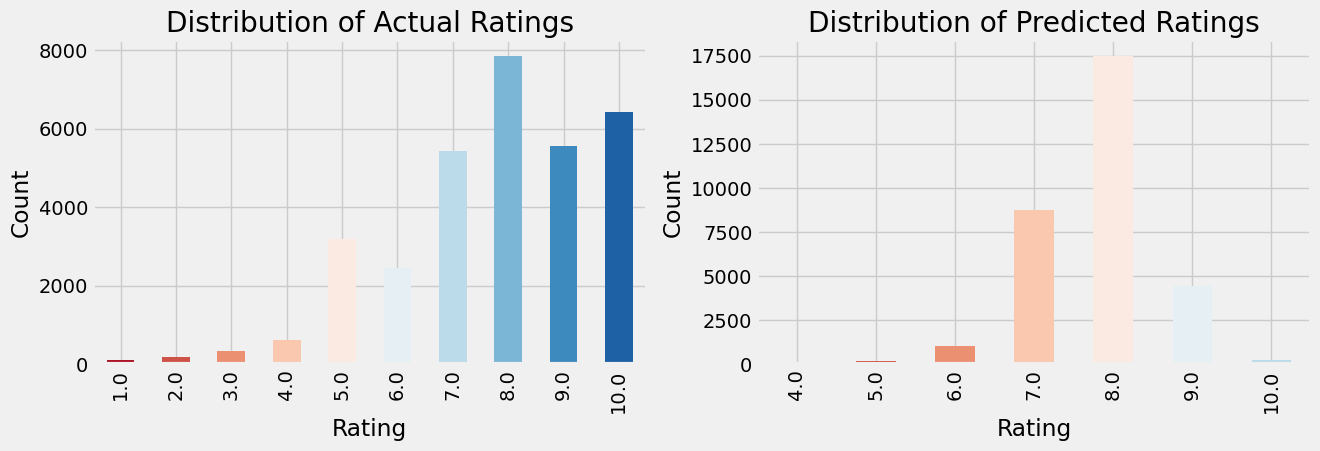

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the color palette
palette = sns.color_palette("RdBu", 10)

# Set figure size
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

# Plot actual ratings
df_pred['actual_rating'].value_counts().sort_index().plot(kind='bar', color=palette, ax=ax1)
ax1.set_title('Distribution of Actual Ratings')
ax1.set_xlabel('Rating')
ax1.set_ylabel('Count')

# Plot predicted ratings
df_pred['pred_rating_round'].value_counts().sort_index().plot(kind='bar', color=palette, ax=ax2)
ax2.set_title('Distribution of Predicted Ratings')
ax2.set_xlabel('Rating')
ax2.set_ylabel('Count')

plt.show()


Absolute error of predicted ratings


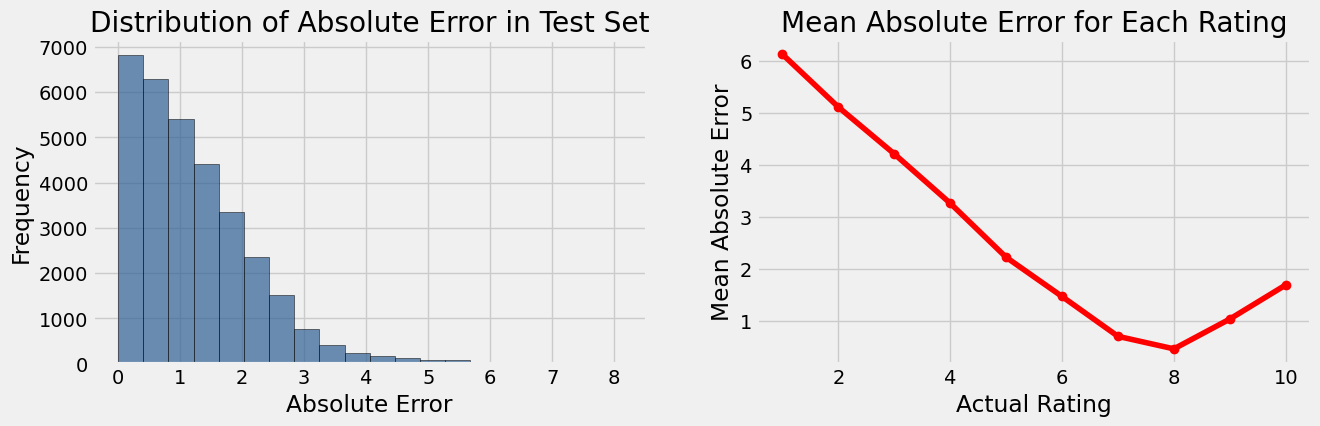

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute Mean Absolute Error for each actual rating
df_pred_err = df_pred.groupby('actual_rating')['abs_err'].mean().reset_index()

# Set figure size
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

# Histogram for absolute error distribution
ax1.hist(df_pred['abs_err'], bins=20, color='#2f6194', edgecolor='black', alpha=0.7)
ax1.set_title('Distribution of Absolute Error in Test Set')
ax1.set_xlabel('Absolute Error')
ax1.set_ylabel('Frequency')

# Line plot for mean absolute error per rating
ax2.plot(df_pred_err['actual_rating'], df_pred_err['abs_err'], marker='o', linestyle='-', color='red')
ax2.set_title('Mean Absolute Error for Each Rating')
ax2.set_xlabel('Actual Rating')
ax2.set_ylabel('Mean Absolute Error')
ax2.grid(True)

plt.show()


Overall, the model performs well, with small errors for most ratings.

Higher errors for extreme ratings suggest that the model may need more data or better regularization.

Further fine-tuning (adjusting latent factors or adding bias terms) could help improve performance on extreme ratings.

In [89]:
df_books = books.copy()
df_books.rename(columns = {'ISBN':'isbn' ,'Book-Title':'book_title'},inplace=True)
df_ext = df.merge(df_books[['isbn', 'book_title']], on='isbn', how='left')
df_ext = df_ext.merge(df_pred[['isbn', 'user_id', 'pred_rating']], on=['isbn', 'user_id'], how='left')

###Train set: Top rated books

In [90]:
selected_user_id = 193458
df_user = df_ext[df_ext['user_id']==selected_user_id]

df_user[(df_user['pred_rating'].isna())&(df_user['book_rating']>=9)].sample(10)

,user_id,isbn,book_rating,Avg_Rating,Total_No_Of_Users_Rated,book_title,pred_rating
113576,193458,0064471047,9,8.714286,42,"The Lion, the Witch, and the Wardrobe (The Chr...",NaN
113615,193458,0553258001,9,8.236842,38,The Cider House Rules,NaN
113585,193458,0140620125,9,8.133333,15,Wuthering Heights (Penguin Popular Classics),NaN
113592,193458,0330352695,9,7.615385,13,Four Letters of Love,NaN
113583,193458,014011369X,9,9.125000,8,"And the Band Played on: Politics, People, and ...",NaN
113587,193458,0142001740,9,8.452769,307,The Secret Life of Bees,NaN
113584,193458,0140298479,9,7.539823,113,Bridget Jones: The Edge of Reason,NaN
113579,193458,0064471071,9,8.733333,15,The Voyage of the Dawn Treader (rack) (Narnia),NaN
113599,193458,0345431057,9,9.125000,8,Slaves in the Family (Ballantine Reader's Circle),NaN
113630,193458,1853260169,10,8.153846,13,Sense and Sensibility (Wordsworth Classics),NaN


####Test set: predicted top rated books

In [91]:
df_user[df_user['pred_rating'].notna()].sort_values('pred_rating', ascending=False).head(5)

,user_id,isbn,book_rating,Avg_Rating,Total_No_Of_Users_Rated,book_title,pred_rating
113594,193458,0345361792,10,8.607735,181,A Prayer for Owen Meany,8.727516
113582,193458,0064471101,9,8.729730,37,The Magician's Nephew (rack) (Narnia),8.664859
113577,193458,0064471055,9,8.545455,22,Prince Caspian (rack) : The Return to Narnia (...,8.446905
113619,193458,0671880314,9,8.305556,36,Schindler's List,8.427884
113601,193458,0394587863,8,8.466667,15,The Witching Hour (Lives of the Mayfair Witches),8.298389


####Test set: actual top rated books

In [92]:
df_user[df_user['pred_rating'].notna()].sort_values('book_rating', ascending=False).head(5)

,user_id,isbn,book_rating,Avg_Rating,Total_No_Of_Users_Rated,book_title,pred_rating
113594,193458,0345361792,10,8.607735,181,A Prayer for Owen Meany,8.727516
113577,193458,0064471055,9,8.545455,22,Prince Caspian (rack) : The Return to Narnia (...,8.446905
113582,193458,0064471101,9,8.729730,37,The Magician's Nephew (rack) (Narnia),8.664859
113619,193458,0671880314,9,8.305556,36,Schindler's List,8.427884
113601,193458,0394587863,8,8.466667,15,The Witching Hour (Lives of the Mayfair Witches),8.298389


Recommendation System Using Item-Based Collaborative Filtering

In [93]:
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import correlation
from sklearn.metrics.pairwise import pairwise_distances
import ipywidgets as widgets
from IPython.display import display, clear_output
from contextlib import contextmanager
import numpy as np
import os, sys
import re
from scipy.sparse import csr_matrix

In [94]:
df_ratings_top.head()

,user_id,isbn,book_rating,Avg_Rating,Total_No_Of_Users_Rated
16,276747,0060517794,9,8.000000,30
19,276747,0671537458,9,7.176471,17
20,276747,0679776818,8,7.476190,21
59,276772,0553572369,7,6.625000,8
61,276772,3499230933,10,7.166667,6


In [95]:
df_ratings_top.rename(columns={'user_id':'userID' ,'isbn':'ISBN','book_rating':'bookRating'},inplace=True)

In [96]:
df_ratings_top.head()

,userID,ISBN,bookRating,Avg_Rating,Total_No_Of_Users_Rated
16,276747,0060517794,9,8.000000,30
19,276747,0671537458,9,7.176471,17
20,276747,0679776818,8,7.476190,21
59,276772,0553572369,7,6.625000,8
61,276772,3499230933,10,7.166667,6


#Implementing KNN

In [97]:
#Generating ratings matrix from explicit ratings table
ratings_matrix = df_ratings_top.pivot(index='userID', columns='ISBN', values='bookRating')
userID = ratings_matrix.index
ISBN = ratings_matrix.columns
print(ratings_matrix.shape)
ratings_matrix.head()
#Notice that most of the values are NaN (undefined) implying absence of ratings

(18549, 13740)


ISBN,0002005018,0002251760,0002558122,0003300277,000617616X,0006480764,000648302X,0006485200,000649840X,0006511767,...,9500723832,950491036X,9505156642,9505156944,9580464162,958704049X,9681500555,9722016563,9812327975,9871138148
userID,,,,,,,,,,,,,,,,,,,,,
8,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
n_users = ratings_matrix.shape[0] #considering only those users who gave explicit ratings
n_books = ratings_matrix.shape[1]
print (n_users, n_books)

18549 13740


In [99]:
ratings_matrix.fillna(0, inplace = True)
ratings_matrix = ratings_matrix.astype(np.int32)

In [100]:
#checking first few rows
ratings_matrix.head(5)

ISBN,0002005018,0002251760,0002558122,0003300277,000617616X,0006480764,000648302X,0006485200,000649840X,0006511767,...,9500723832,950491036X,9505156642,9505156944,9580464162,958704049X,9681500555,9722016563,9812327975,9871138148
userID,,,,,,,,,,,,,,,,,,,,,
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
sparsity = 1.0-len(ratings_explicit)/float(ratings_explicit.shape[0]*n_books)
print ('The sparsity level of Book Crossing dataset is ' +  str(sparsity*100) + ' %')

The sparsity level of Book Crossing dataset is 99.99272197962155 %


In [102]:
combine_book_rating = pd.merge(ratings, books, on = 'ISBN')
columns = ['Book-Author','Year-Of-Publication', 'Publisher']

In [103]:
combine_book_rating = combine_book_rating.drop(columns, axis = 1)
combine_book_rating.rename(columns={'User-ID':'userID','Book-Title':'bookTitle','Book-Rating':'bookRating'},inplace=True)
combine_book_rating.head()

,userID,ISBN,bookRating,bookTitle
0,276725,034545104X,0,Flesh Tones: A Novel
1,276726,0155061224,5,Rites of Passage
2,276727,0446520802,0,The Notebook
3,276729,052165615X,3,Help!: Level 1
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...


In [104]:
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['bookTitle'])

In [105]:
book_ratingcount = (combine_book_rating.
                    groupby(by = ['bookTitle',])['bookRating'].
                    count().
                    reset_index().
                    rename(columns = {'bookRating':'TotalRatingCount'})
                    [['bookTitle','TotalRatingCount']])

In [106]:
book_ratingcount.head()

,bookTitle,TotalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


Combine the rating data with the total rating count data, this gives us exactly what we need to filter out the lesser known books

In [107]:
rating_with_totalratingcount = combine_book_rating.merge(book_ratingcount, left_on = 'bookTitle', right_on = 'bookTitle', how = 'inner' )

In [108]:
rating_with_totalratingcount.head()

,userID,ISBN,bookRating,bookTitle,TotalRatingCount
0,276725,034545104X,0,Flesh Tones: A Novel,60
1,276726,0155061224,5,Rites of Passage,14
2,276727,0446520802,0,The Notebook,650
3,276729,052165615X,3,Help!: Level 1,1
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,1


In [109]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingcount['TotalRatingCount'].describe())

count   241071.000
mean         4.277
std         16.739
min          1.000
25%          1.000
50%          1.000
75%          3.000
max       2502.000
Name: TotalRatingCount, dtype: float64


The majority of books have been rated only once. Now, let’s examine the higher end of the distribution.

In [110]:
print(book_ratingcount['TotalRatingCount'].quantile(np.arange(.9,1,.01)))

0.900    7.000
0.910    8.000
0.920    9.000
0.930   10.000
0.940   11.000
0.950   13.000
0.960   16.000
0.970   20.000
0.980   29.000
0.990   50.000
Name: TotalRatingCount, dtype: float64


Approximately 1% of the books have received 50 or more ratings. Given the large number of books in our dataset, we will focus on the top 1%.

In [111]:
popularity_threshold = 50
rating_popular_book = rating_with_totalratingcount.query('TotalRatingCount >= @popularity_threshold')

In [112]:
rating_popular_book.head()

,userID,ISBN,bookRating,bookTitle,TotalRatingCount
0,276725,034545104X,0,Flesh Tones: A Novel,60
2,276727,0446520802,0,The Notebook,650
6,276744,038550120X,7,A Painted House,838
7,276746,0425115801,0,Lightning,274
8,276746,0449006522,0,Manhattan Hunt Club,111


In [113]:
if not rating_popular_book[rating_popular_book.duplicated(['userID', 'bookTitle'])].empty:
    initial_rows = rating_popular_book.shape[0]

    print('Initial dataframe shape {0}'.format(rating_popular_book.shape))
    rating_popular_book = rating_popular_book.drop_duplicates(['userID', 'bookTitle'])
    current_rows = rating_popular_book.shape[0]
    print('New dataframe shape {0}'.format(rating_popular_book.shape))
    print('Removed {0} rows'.format(initial_rows - current_rows))

Initial dataframe shape (288740, 5)
New dataframe shape (285518, 5)
Removed 3222 rows


In [114]:
us_canada_user_rating_pivot = rating_popular_book.pivot(index = 'bookTitle',columns = 'userID', values = 'bookRating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

In [115]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [116]:
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index, :].values.reshape((1, -1)), n_neighbors = 6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Wuthering Heights:

1: Gone with the Wind, with distance of 0.9151627446881274:
2: Anne of Green Gables, with distance of 0.9155545711350497:
3: Rush Limbaugh Is a Big Fat Idiot: And Other Observations, with distance of 0.9238629456118145:
4: Jane Eyre (Bantam Classics), with distance of 0.9258690233330367:
5: The Crucible: A Play in Four Acts (Penguin Plays), with distance of 0.9267104317301488:


In [117]:
us_canada_user_rating_pivot2 = rating_popular_book.pivot(index = 'userID', columns = 'bookTitle', values = 'bookRating').fillna(0)

In [118]:
us_canada_user_rating_pivot2.head()

bookTitle,10 Lb. Penalty,16 Lighthouse Road,1984,1st to Die: A Novel,2010: Odyssey Two,204 Rosewood Lane,2061: Odyssey Three,24 Hours,2nd Chance,3rd Degree,...,YOU BELONG TO ME,Year of Wonders,You Belong To Me,You Shall Know Our Velocity,Young Wives,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw""","\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""",stardust
userID,,,,,,,,,,,,,,,,,,,,,
8,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
9,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
14,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
16,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
17,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [119]:
us_canada_user_rating_pivot2.shape

(47994, 2444)

In [120]:
X = us_canada_user_rating_pivot2.values.T
X.shape

(2444, 47994)

In [121]:
import sklearn
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=12, random_state=17)
matrix = SVD.fit_transform(X)
matrix.shape

(2444, 12)

In [122]:
corr = np.corrcoef(matrix)
corr.shape

(2444, 2444)

Let's find books similar to Harry Potter and the Sorcerer's Stone (Book 1)

In [123]:
us_canada_book_title = us_canada_user_rating_pivot2.columns
us_canada_book_list = list(us_canada_book_title)
coffey_hands = us_canada_book_list.index("Harry Potter and the Sorcerer's Stone (Book 1)")

In [124]:
corr_coffey_hands  = corr[coffey_hands]

In [125]:
list(us_canada_book_title[(corr_coffey_hands<1.0) & (corr_coffey_hands>0.9)])

['Harry Potter and the Chamber of Secrets (Book 2)',
 'Harry Potter and the Goblet of Fire (Book 4)',
 'Harry Potter and the Order of the Phoenix (Book 5)',
 'Harry Potter and the Prisoner of Azkaban (Book 3)',
 "Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))"]

In [126]:
ratings_explicit.head()
ratings_explicit.rename(columns={'user_id':'User-ID','isbn':'ISBN','book_rating':'Book-Rating'},inplace=True)

In [127]:
ratings_explicit.head()

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated
1,276726,0155061224,5,5.000,1
3,276729,052165615X,3,3.000,1
4,276729,0521795028,6,6.000,1
8,276744,038550120X,7,7.580,81
16,276747,0060517794,9,8.000,30


In [128]:
users_interactions_count_df = ratings_explicit.groupby(['ISBN', 'User-ID']).size().groupby('User-ID').size()
print('# of users: %d' % len(users_interactions_count_df))

users_with_enough_interactions_df = users_interactions_count_df[users_interactions_count_df >= 100].reset_index()[['User-ID']]
print('# of users with at least 5 interactions: %d' % len(users_with_enough_interactions_df))

# of users: 68091
# of users with at least 5 interactions: 449


In [129]:
print('# of interactions: %d' % len(ratings_explicit))
interactions_from_selected_users_df = ratings_explicit.merge(users_with_enough_interactions_df, 
               how = 'right',
               left_on = 'User-ID',
               right_on = 'User-ID')
print('# of interactions from users with at least 5 interactions: %d' % len(interactions_from_selected_users_df))

# of interactions: 383842
# of interactions from users with at least 5 interactions: 103271


In [130]:
interactions_from_selected_users_df.head(10)

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated
0,2033,0030020786,7,7.000,1
1,2033,0060248025,10,8.767,30
2,2033,0060256664,10,8.333,6
3,2033,0060256737,10,9.045,22
4,2033,0060950536,10,9.400,5
5,2033,0061020419,7,7.000,1
6,2033,0061020427,6,6.000,1
7,2033,0061056278,10,9.000,2
8,2033,0061056286,8,7.667,3
9,2033,0061056294,9,7.000,2


In [131]:
import math

In [132]:
def smooth_user_preference(x):
    return math.log(1+x, 2)
    
interactions_full_df = interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum().apply(smooth_user_preference).reset_index()
print('# of unique user/item interactions: %d' % len(interactions_full_df))
interactions_full_df.head()

# of unique user/item interactions: 103271


,ISBN,User-ID,Book-Rating
0,0000913154,171118,3.170
1,0001046438,23902,3.322
2,000104687X,23902,2.807
3,0001047213,23902,3.322
4,0001047973,23902,3.322


In [133]:
from sklearn.model_selection import train_test_split

In [134]:
interactions_train_df, interactions_test_df = train_test_split(interactions_full_df,
                                   stratify=interactions_full_df['User-ID'], 
                                   test_size=0.20,
                                   random_state=42)

print('# interactions on Train set: %d' % len(interactions_train_df))
print('# interactions on Test set: %d' % len(interactions_test_df))

# interactions on Train set: 82616
# interactions on Test set: 20655


In [135]:
interactions_test_df.head()

,ISBN,User-ID,Book-Rating
87596,0879051213,95010,3.000
52630,0515101230,129074,3.000
68434,0679427724,75819,3.170
85835,0843951346,135149,3.322
92752,1551665727,158295,3.170


In [136]:
#Creating a sparse pivot table with users in rows and items in columns
users_items_pivot_matrix_df = interactions_train_df.pivot(index='User-ID', 
                                                          columns='ISBN', 
                                                          values='Book-Rating').fillna(0)

users_items_pivot_matrix_df.head()

ISBN,0000913154,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001055607,0001056107,0001845039,...,B00007FYKW,B00008RWPV,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
User-ID,,,,,,,,,,,,,,,,,,,,,
2033,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2110,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2276,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4017,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4385,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [137]:
users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_items_pivot_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [138]:
users_ids = list(users_items_pivot_matrix_df.index)
users_ids[:10]

[2033, 2110, 2276, 4017, 4385, 5582, 6242, 6251, 6543, 6575]

In [139]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

In [140]:
# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 15

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(users_items_pivot_matrix, k = NUMBER_OF_FACTORS_MF)

In [141]:
users_items_pivot_matrix.shape

(449, 55743)

In [142]:
U.shape

(449, 15)

In [143]:
sigma = np.diag(sigma)
sigma.shape

(15, 15)

In [144]:
Vt.shape

(15, 55743)

After factorization, we reconstruct the original matrix by multiplying its factors. The resulting matrix is no longer sparse, as it generates predictions for items the user has not yet interacted with. We can leverage this for making recommendations.

In [145]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
all_user_predicted_ratings

array([[ 1.48048195e-02,  2.31728082e-03,  2.74202603e-03, ...,
         2.27788796e-04,  5.49322969e-04,  1.26270997e-02],
       [-7.38279388e-04, -8.94254584e-04, -1.05816668e-03, ...,
         8.58241199e-05,  1.78651132e-04,  4.24690377e-03],
       [-2.00559626e-03, -1.73047641e-03, -2.04766350e-03, ...,
         1.78220412e-04,  4.04160623e-04,  7.29766631e-03],
       ...,
       [ 4.20550556e-03,  1.96625381e-03,  2.32665764e-03, ...,
         2.49809614e-04,  4.73258210e-04,  8.35154052e-03],
       [ 1.13675090e-02, -2.21445596e-03, -2.62035392e-03, ...,
         3.41186005e-04,  6.59446393e-04,  1.16707765e-02],
       [-1.44606285e-03,  5.14009860e-03,  6.08225124e-03, ...,
         8.58660344e-05,  1.46974496e-04,  2.89210573e-03]])

In [146]:
all_user_predicted_ratings.shape

(449, 55743)

In [147]:
#Converting the reconstructed matrix back to a Pandas dataframe
cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head()

,2033,2110,2276,4017,4385,5582,6242,6251,6543,6575,...,269566,270713,271448,271705,273113,274061,274301,275970,277427,278418
ISBN,,,,,,,,,,,,,,,,,,,,,
0000913154,0.015,-0.001,-0.002,0.001,-0.002,-0.003,-0.003,0.007,0.001,0.013,...,0.001,0.003,-0.002,0.008,-0.012,0.001,0.008,0.004,0.011,-0.001
000104687X,0.002,-0.001,-0.002,0.017,-0.001,0.009,0.014,0.007,-0.003,0.016,...,-0.002,0.013,-0.001,0.014,-0.005,-0.006,0.008,0.002,-0.002,0.005
0001047213,0.003,-0.001,-0.002,0.020,-0.001,0.010,0.016,0.009,-0.004,0.019,...,-0.003,0.016,-0.001,0.016,-0.005,-0.007,0.009,0.002,-0.003,0.006
0001047973,0.003,-0.001,-0.002,0.020,-0.001,0.010,0.016,0.009,-0.004,0.019,...,-0.003,0.016,-0.001,0.016,-0.005,-0.007,0.009,0.002,-0.003,0.006
000104799X,0.001,0.000,0.001,0.002,0.000,0.001,0.001,0.002,0.002,0.004,...,0.001,0.002,0.003,0.001,0.002,0.002,0.002,0.001,0.001,0.000


In [148]:
len(cf_preds_df.columns)

449

In [149]:
global books
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.000,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001.000,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991.000,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.000,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.000,W. W. Norton &amp; Company


In [150]:
#Indexing by personId to speed up the searches during evaluation
interactions_full_indexed_df = interactions_full_df.set_index('User-ID')
interactions_train_indexed_df = interactions_train_df.set_index('User-ID')
interactions_test_indexed_df = interactions_test_df.set_index('User-ID')

In [151]:
def get_items_interacted(UserID, interactions_df):
    interacted_items = interactions_df.loc[UserID]['ISBN']
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [152]:
import random as rd
import pandas as pd
class RecommenderSystem:
    def __init__(self, model, books_df, cf_preds_df):
        self.model = model
        self.books_df = books_df
        self.cf_preds_df = cf_preds_df
    
    # Get items a user has interacted with
    def get_items_interacted(self, UserID, interactions_df):
        try:
            # Try directly accessing the user data - works for MultiIndex
            user_data = interactions_df.xs(UserID, level='User-ID')
            # Return unique ISBN values
            return set(user_data.index)
        except Exception:
            # If above method fails, try using a filter
            try:
                # Try selecting rows where User-ID equals UserID
                user_items = interactions_df.reset_index().query(f'`User-ID` == {UserID}')['ISBN'].unique()
                return set(user_items)
            except Exception:
                # If all else fails
                return set()

    # Get a sample of items a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, interactions_full_indexed_df, seed=42):
        import random
        interacted_items = self.get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(self.cf_preds_df.index)
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, min(sample_size, len(non_interacted_items)))
        return set(non_interacted_items_sample)

    # Function to verify whether an item is in the top-N recommendations
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
        try:
            index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            hit = int(index in range(0, topn))
        except StopIteration:
            index = -1
            hit = 0
        return hit, index
    
    # Generate recommendations for a user - FIXED to avoid merge ambiguity
    def recommend_items(self, user_id, items_to_ignore=None, topn=10):
        if items_to_ignore is None:
            items_to_ignore = []
            
        # Check if user_id exists in cf_preds_df
        if user_id not in self.cf_preds_df.columns:
            print(f"User {user_id} not found in prediction data")
            return pd.DataFrame()
            
        # Get the user's predicted ratings
        user_column_idx = self.cf_preds_df.columns.get_loc(user_id)
        
        # Create a DataFrame of the user's predicted ratings
        # Reset the index to convert the ISBN index to a column
        recommendations = pd.DataFrame({
            'ISBN': self.cf_preds_df.index.tolist(),
            'predicted_rating': self.cf_preds_df.iloc[:, user_column_idx].values
        })
        
        # Remove items that should be ignored
        recommendations = recommendations[~recommendations['ISBN'].isin(items_to_ignore)]
        
        # Sort by predicted rating
        recommendations = recommendations.sort_values('predicted_rating', ascending=False)
        
        # Create a dictionary mapping ISBN to book title for fast lookup
        isbn_to_title = dict(zip(self.books_df['ISBN'], self.books_df['Book-Title']))
        
        # Add book titles using the dictionary (avoiding merge)
        recommendations['book_title'] = recommendations['ISBN'].map(isbn_to_title)
        
        # Filter out books where we couldn't find a title
        recommendations = recommendations.dropna(subset=['book_title'])
        
        return recommendations.head(topn)

    # Function to evaluate the model for a user and print recommendations
    def evaluate_model_for_user(self, user_id):
        print(f"Finding recommendations for user {user_id}...")
        
        # Get items the user has interacted with in the training set
        items_to_ignore = self.get_items_interacted(user_id, interactions_train_indexed_df)
        
        print(f"User has interacted with {len(items_to_ignore)} items.")
        
        # Get recommendations for this user
        recommendations = self.recommend_items(user_id, items_to_ignore=items_to_ignore, topn=10)
        
        if not recommendations.empty:
            print(f'Recommendations for User-ID = {user_id}')
            print(recommendations[['book_title', 'predicted_rating']].head(10))
        else:
            print(f"No recommendations found for user {user_id}")

    # Main function to recommend books
    def recommend_book(self, user_id):        
        self.evaluate_model_for_user(user_id)

In [153]:
import pandas as pd
import numpy as np
import random

# Initialize the recommender system with your model and data
recommender = RecommenderSystem(model, books, cf_preds_df)

# Let's get some user IDs that definitely exist in both datasets
# First, check the column names in cf_preds_df to make sure we're accessing it correctly
print(f"First few column names in cf_preds_df: {cf_preds_df.columns[:5]}")

# Generate recommendations for a few users from cf_preds_df columns
users_to_try = list(cf_preds_df.columns[:3])  # First 3 users from predictions
print(f"Trying users: {users_to_try}")

for user_id in users_to_try:
    try:
        print("\n" + "="*50)
        print(f"\nRecommendations for User {user_id}:")
        recommender.recommend_book(user_id)
    except Exception as e:
        print(f"Error generating recommendations for user {user_id}: {str(e)}")
        import traceback
        traceback.print_exc()

First few column names in cf_preds_df: Index([2033, 2110, 2276, 4017, 4385], dtype='int64')
Trying users: [2033, 2110, 2276]


Recommendations for User 2033:
Finding recommendations for user 2033...
User has interacted with 103 items.
Recommendations for User-ID = 2033
                                              book_title  predicted_rating
20185                                     A Time to Kill             0.212
29723  Harry Potter and the Sorcerer's Stone (Harry P...             0.196
8719                           The Lovely Bones: A Novel             0.170
40352                                  The Joy Luck Club             0.158
29722     Harry Potter and the Sorcerer's Stone (Book 1)             0.149
43307  Homicidal Psycho Jungle Cat: A Calvin and Hobb...             0.145
43310                    The Essential Calvin and Hobbes             0.143
21446                              To Kill a Mockingbird             0.142
18360                                  Lord of the Flie

In [154]:
df_user.head()

,user_id,isbn,book_rating,Avg_Rating,Total_No_Of_Users_Rated,book_title,pred_rating
113576,193458,0064471047,9,8.714,42,"The Lion, the Witch, and the Wardrobe (The Chr...",NaN
113577,193458,0064471055,9,8.545,22,Prince Caspian (rack) : The Return to Narnia (...,8.447
113578,193458,0064471063,9,8.519,27,The Horse and His Boy,NaN
113579,193458,0064471071,9,8.733,15,The Voyage of the Dawn Treader (rack) (Narnia),NaN
113580,193458,006447108X,9,8.833,18,The Last Battle,NaN
